## NEURAL NETS ON PYTORCH

* DATASET: **MNIST**
* AUTHOR: *yashlab*

In [1]:
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import matplotlib.pyplot as plt

Glance at MNIST dataset:

<img src='FILES/mnist.png'>

In [2]:
from torchvision import datasets, transforms

# transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [3]:
dataiter = iter(trainloader) # create an iterator object on trainloader
images, labels = dataiter.next() # perform an iteration 
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


In [4]:
# Function to display an image
def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406]) # standard normailised mean for MNIST
        std = np.array([0.229, 0.224, 0.225]) # # standard normailised std for MNIST
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

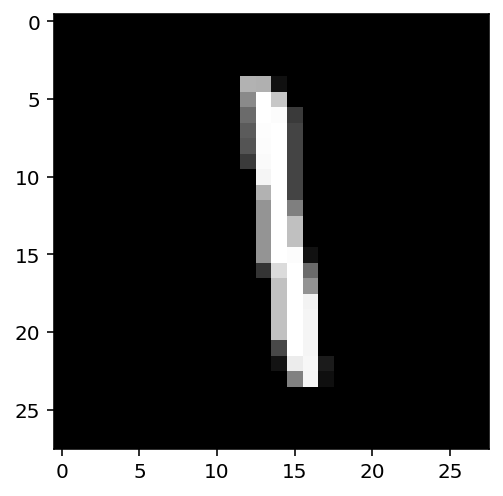

In [5]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [6]:
from torch import nn

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.LogSoftmax(dim=1)
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): LogSoftmax()
)

In [7]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images)
loss = criterion(logps, labels)

In [8]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [9]:
print('Initial weights - ', model.hidden.weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model.hidden.weight.grad)

Initial weights -  Parameter containing:
tensor([[ 0.0107,  0.0172,  0.0196,  ...,  0.0136,  0.0344, -0.0306],
        [-0.0220, -0.0262, -0.0294,  ..., -0.0227,  0.0184, -0.0319],
        [-0.0129,  0.0324, -0.0332,  ...,  0.0259,  0.0004,  0.0151],
        ...,
        [-0.0174,  0.0267, -0.0038,  ..., -0.0086, -0.0115, -0.0177],
        [-0.0157, -0.0153,  0.0003,  ...,  0.0316,  0.0189,  0.0103],
        [ 0.0256,  0.0341, -0.0035,  ...,  0.0200,  0.0308, -0.0139]],
       requires_grad=True)
Gradient - tensor([[-0.0005, -0.0005, -0.0005,  ..., -0.0005, -0.0005, -0.0005],
        [-0.0001, -0.0001, -0.0001,  ..., -0.0001, -0.0001, -0.0001],
        [ 0.0020,  0.0020,  0.0020,  ...,  0.0020,  0.0020,  0.0020],
        ...,
        [-0.0007, -0.0007, -0.0007,  ..., -0.0007, -0.0007, -0.0007],
        [ 0.0016,  0.0016,  0.0016,  ...,  0.0016,  0.0016,  0.0016],
        [ 0.0003,  0.0003,  0.0003,  ...,  0.0003,  0.0003,  0.0003]])


In [10]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model.hidden.weight)

Updated weights -  Parameter containing:
tensor([[ 0.0107,  0.0172,  0.0196,  ...,  0.0136,  0.0344, -0.0306],
        [-0.0220, -0.0262, -0.0294,  ..., -0.0227,  0.0184, -0.0319],
        [-0.0130,  0.0324, -0.0332,  ...,  0.0259,  0.0004,  0.0151],
        ...,
        [-0.0174,  0.0267, -0.0038,  ..., -0.0086, -0.0115, -0.0176],
        [-0.0157, -0.0153,  0.0003,  ...,  0.0315,  0.0189,  0.0103],
        [ 0.0256,  0.0341, -0.0035,  ...,  0.0200,  0.0308, -0.0139]],
       requires_grad=True)


Repeating the same process over a batch from the trainloader

In [11]:
epochs = 8
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.7002696670703035
Training loss: 0.8185321937110632
Training loss: 0.5687685708628535
Training loss: 0.4738895250504205
Training loss: 0.4240077264082711
Training loss: 0.3930967594228828
Training loss: 0.37172762015417443
Training loss: 0.35567270773750886


In [12]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

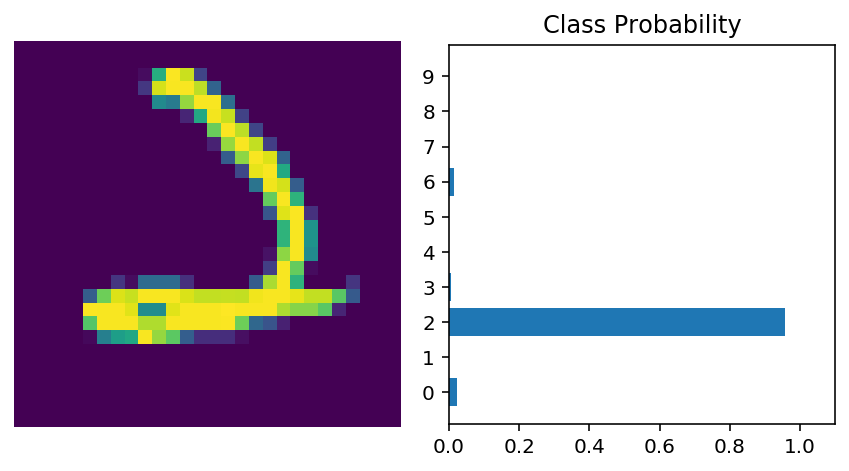

In [14]:
%matplotlib inline

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
view_classify(img.view(1, 28, 28), ps)

> ### **Summary**:
    * Trained a simple neural net with only 1 hidden layer.
    * Understood Forward and Backpropagation
    

> ### **Further Ahead**:
    * Need to understand how our model performs on unseen data
    * Deduce a method to find out accuracy metrics